### Setting up the data (10 points)

The following is the snippet of code to load the datasets, and split it into train and validation data:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
import warnings
warnings.filterwarnings("ignore")
np.random.seed(0)

# Data Loading
X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)
X,Y = ml.shuffleData(X,Y)

def print_info(X, name):
    for i in range(X.shape[1]):
        print(i + 1)
        print(name + " min is:", np.min(X[:, i]), name + " max is:", np.max(X[:, i]))
        print(name + " mean is:",np.mean(X[:,i]), name + " variance is:",np.var(X[:,i]))


In [4]:
# 1.1
print_info(X, '')

1
 min is: 193.5  max is: 253.0
 mean is: 241.60110369999998  variance is: 83.49917114984629
2
 min is: 152.5  max is: 249.0
 mean is: 227.37657129999997  variance is: 92.62559312501632
3
 min is: 214.25  max is: 252.5
 mean is: 241.55415050000005  variance is: 35.28633980334974
4
 min is: 152.5  max is: 252.5
 mean is: 232.82676814999996  variance is: 97.62573174864559
5
 min is: 10.0  max is: 31048.0
 mean is: 3089.923365  variance is: 15651513.756432075
6
 min is: 0.0  max is: 13630.0
 mean is: 928.25902  variance is: 3081761.8169486397
7
 min is: 0.0  max is: 9238.0
 mean is: 138.09383  variance is: 443951.74644593114
8
 min is: 0.0  max is: 125.17
 mean is: 3.2485793303  variance is: 8.219485024912496
9
 min is: 0.87589  max is: 19.167
 mean is: 6.498652902750002  variance is: 6.405048191357353
10
 min is: 0.0  max is: 13.23
 mean is: 2.09713912048  variance is: 4.363440470613409
11
 min is: 0.0  max is: 66.761
 mean is: 4.21766040935  variance is: 4.0863718842269074
12
 min is: 0

In [5]:
# 1.2
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
Xt, Yt = Xtr[:5000], Ytr[:5000]
Xv, Yv = Xva[:1000], Yva[:1000]
XtS, params = ml.rescale(Xt)
XvS, _ = ml.rescale(Xv, params)

print('---XtS-----')

print_info(XtS, 'XtS')

print('---XvS-----')

print_info(XvS, 'XvS')

---XtS-----
1
XtS min is: -4.558715587046936 XtS max is: 1.2467770921818002
XtS mean is: 1.81572090696136e-14 XtS variance is: 0.9999999999999946
2
XtS min is: -3.9326292964904943 XtS max is: 1.7308930372367421
XtS mean is: -1.0519585202928282e-15 XtS variance is: 0.9999999999999986
3
XtS min is: -4.561196224457106 XtS max is: 1.7989752876082032
XtS mean is: -1.653432946113753e-15 XtS variance is: 0.9999999999999978
4
XtS min is: -2.8135593973832225 XtS max is: 1.951320393537379
XtS mean is: -6.629718996009615e-15 XtS variance is: 0.9999999999999982
5
XtS min is: -0.7744295934897558 XtS max is: 7.031513625827075
XtS mean is: -1.4921397450962103e-17 XtS variance is: 0.9999999999999989
6
XtS min is: -0.5347218995032653 XtS max is: 7.460144686226129
XtS mean is: 9.947598300641403e-18 XtS variance is: 0.9999999999999778
7
XtS min is: -0.19480860986331436 XtS max is: 14.391481908922685
XtS mean is: -2.842170943040401e-18 XtS variance is: 1.0000000000000497
8
XtS min is: -1.1553268879751641 

### Linear Classifiers (20 points)

In [4]:
def plot(xlist, tr_auc, va_auc, xname):
    plt.plot(xlist, tr_auc, c='r', label='train')
    plt.plot(xlist, va_auc, c='b', label='validation')
    plt.xlabel(xname)
    plt.ylabel('auc')
    plt.show()

def linear_classfier_print(learner, XtS, Yt, XvS, Yv):
    reg = [0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0] 
    tr_auc = []
    va_auc = []
    for r in reg:
        learner.train(XtS, Yt, reg=r, initStep=0.5, stopTol=1e-6, stopIter=100)
        tr_auc.append(learner.auc(XtS, Yt))
        va_auc.append(learner.auc(XvS, Yv))
    plot(reg, tr_auc, va_auc, 'reg')

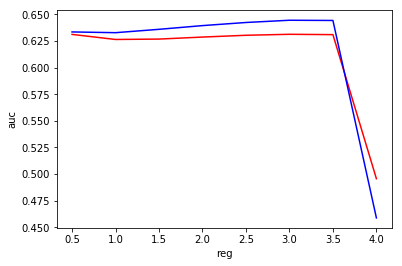

In [5]:
# 2.1
learner = ml.linearC.linearClassify()
linear_classfier_print(learner, XtS, Yt, XvS, Yv)

In [6]:
# 2.2
Xt2 = ml.transforms.fpoly(Xt, 2, bias=False)
Xv2 = ml.transforms.fpoly(Xv, 2, bias=False)
print(Xt2.shape[1])

# We originally have 14 features from x1 -> x14
# we pick 2 different from them to combine a new xi * xj feature, it will be 14 * 13 / 2 -> 91
# we convert every feature to its square  x1 -> x1 * x1 , it will be 14

# so, totally 14 + 14 + 91 = 119

119


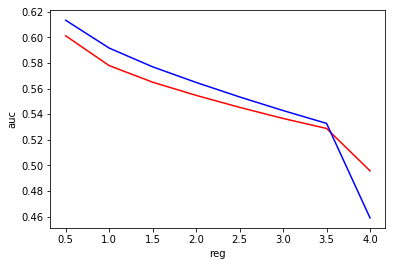

In [7]:
# 2.3
XtS2, params = ml.rescale(Xt2)
XvS2, _ = ml.rescale(Xv2, params)
learner_trans = ml.linearC.linearClassify()
linear_classfier_print(learner_trans, XtS2, Yt, XvS2, Yv)

###  Nearest Neighbors (20 points)

In [8]:
def nearest_neighbors_print(XtS, Yt, XvS, Yv):
    klist = [1, 5, 10, 50, 100, 200, 400] 
    tr_auc = []
    va_auc = []
    for k in klist:
        learner = ml.knn.knnClassify()
        learner.train(XtS, Yt, K=k, alpha=0.0)
        tr_auc.append(learner.auc(XtS, Yt))
        va_auc.append(learner.auc(XvS, Yv))
        
    plot(klist, tr_auc, va_auc, 'k')

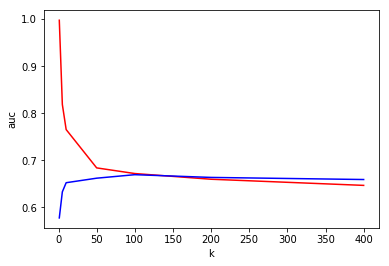

In [9]:
# 3.1
nearest_neighbors_print(XtS, Yt, XvS, Yv)

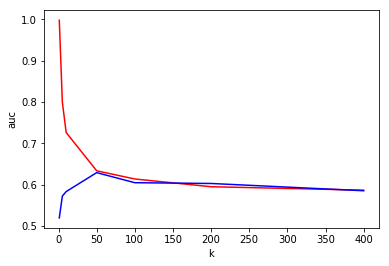

In [10]:
# 3.2
nearest_neighbors_print(Xt, Yt, Xv, Yv)

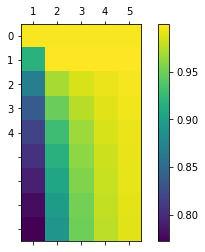

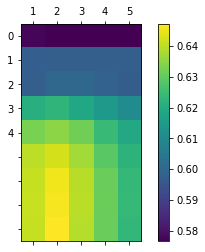

In [11]:
# 3.3
def plot_2d_auc(_2d_auc, x_list, y_list):
    f, ax = plt.subplots(1, 1)
    cax = ax.matshow(_2d_auc, interpolation='nearest')
    f.colorbar(cax)
    ax.set_xticklabels(['']+list(x_list))
    ax.set_yticklabels(['']+list(y_list))
    plt.show()
    
K = range(1,10,1) # Or something else
A = range(0,5,1) # Or something else
tr_auc = np.zeros((len(K),len(A)))
va_auc = np.zeros((len(K),len(A)))
for i,k in enumerate(K):
    for j,a in enumerate(A):
        learner = ml.knn.knnClassify()
        learner.train(XtS, Yt, K=k, alpha=a)
        tr_auc[i][j] = learner.auc(XtS, Yt)  # train learner using k and a
        va_auc[i][j] = learner.auc(XvS, Yv)
        
plot_2d_auc(tr_auc, K, A)
plot_2d_auc(va_auc, K, A)

I would recommand the K is 9 and a is 2

### Decision Trees (20 points)

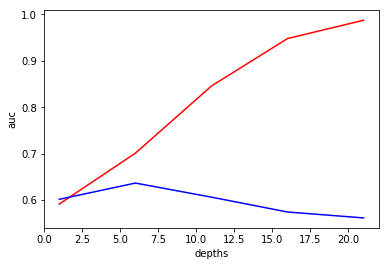

In [12]:
# 4.1
depths = range(1,25,5)
tr_auc = []
va_auc = []

for d in depths:
    learner = ml.dtree.treeClassify(XtS, Yt, maxDepth=d)
    tr_auc.append(learner.auc(XtS, Yt))
    va_auc.append(learner.auc(XvS, Yv))

plot(depths, tr_auc, va_auc, 'depths')

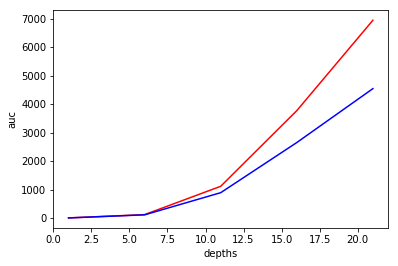

In [13]:
# 4.2
node_minParent_2 = []
node_minParent_4 = []

for d in depths:
    learner = ml.dtree.treeClassify(XtS, Yt, minParent=2, maxDepth=d)
    node_minParent_2.append(learner.sz)
    
    learner = ml.dtree.treeClassify(XtS, Yt, minParent=4, maxDepth=d)
    node_minParent_4.append(learner.sz)

plot(depths, node_minParent_2, node_minParent_4, 'depths')

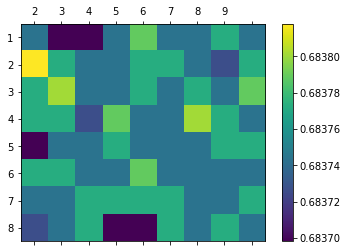

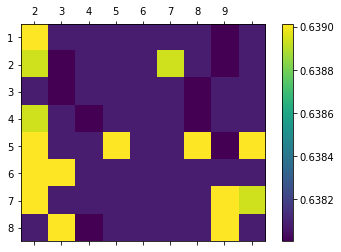

In [14]:
# 4.3
minParents = range(2,10,1)
minLeaves = range(1,10,1)

tr_auc = np.zeros((len(minParents),len(minLeaves)))
va_auc = np.zeros((len(minParents),len(minLeaves)))
for i,p in enumerate(minParents):
    for j,l in enumerate(minLeaves):
        learner = ml.dtree.treeClassify(XtS, Yt, maxDepth=5)
        tr_auc[i][j] = learner.auc(XtS, Yt)
        va_auc[i][j] = learner.auc(XvS, Yv)
        
plot_2d_auc(tr_auc, minParents, minLeaves)
plot_2d_auc(va_auc, minParents, minLeaves)

I would recommand the minParent is 8 and minLeaf is 3

### Neural Networks (20 points)

In [ ]:
# 5.1
nodes = range(1,5,1)
layers = range(1,8,1)
tr_auc = np.zeros((len(nodes),len(layers)))
va_auc = np.zeros((len(nodes),len(layers)))
for i,n in enumerate(nodes):
    for j,l in enumerate(layers):
        nn = ml.nnet.nnetClassify()
        nn.init_weights([XtS.shape[1]] + [n for x in range(1,l+1)] + [2], 'random', XtS, Yt)
        nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=300)
        tr_auc[i][j] = nn.auc(XtS, Yt)
        va_auc[i][j] = nn.auc(XvS, Yv)

plot_2d_auc(tr_auc, nodes, layers)
plot_2d_auc(va_auc, nodes, layers)

In [ ]:
# 5.2
def sig(z): return np.atleast_2d(z)
def dsig(z): return np.atleast_2d(1)

def activation_switch(name):
    nn = ml.nnet.nnetClassify()
    nn.init_weights([XtS.shape[1],5,2], 'random', XtS, Yt) 
    nn.setActivation(name, sig, dsig)
    nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=300)
    print(name + " trian auc:",nn.auc(XtS,Yt))
    print(name + " validation auc:",nn.auc(XvS,Yv))

activation_switch('custom')
activation_switch('logistic')
activation_switch('htangent')

In this case, the custom activation is better than the logistic activation and a little worse than the htangent activation.

### Conclusions (5 points)

In [ ]:
Xte = np.genfromtxt('data/X_test.txt', delimiter=None)
learner = .. # train one using X,Y
Yte = np.vstack((np.arange(Xte.shape[0]), learner.predictSoft(Xte)[:,1])).T
np.savetxt('Y_submit.txt', Yte, '%d, %.2f', header='ID,Prob1', comments='', delimiter=',')

### Statement of Collaboration (5 points)